In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib     
font = {'size'   : 12}
matplotlib.rc('font', **font)


# Wellfare Loss - Single Normal Distribution $\mu=0$ 

## The data

In [41]:
df = pd.read_csv('2020.01.31 - QVoting-NormalizedPivotality 1p1v-vs-QV-mean=0-agg.csv')

def color(x):
    if x == 3:
        return 'blue'
    else:
        return 'orange'

df['wellfare-loss'] = 1 - df['mean payoff-sign-list']
df['color'] = df['majority-utility-stdev'].apply(color)
df.rename(columns={'variance-of-perceived-pivotality': 'variance-of-pp'}, inplace=True)
df[0:5]

,[run number],number-of-voters,minority-fraction,majority-mean-utility,majority-utility-stdev,minority-mean-utility,minority-utility-stdev,marginal-pivotality,variance-of-pp,limit-votes?,...,voting-mechanism,[step],mean payoff-sign-list,mean payoff-list,standard-deviation payoff-list,mean vote-sum-list,standard-deviation vote-sum-list,mean mean-median-same-sign-list,wellfare-loss,color
0,2,10,0,0,3,10,1,0.5,0.0003,False,...,QV,1000,0.985,7.511402,5.709273,-0.016389,4.718080,0.824,0.015,blue
1,1,10,0,0,3,10,1,0.5,0.0003,False,...,1p1v,1000,0.780,5.425746,7.052433,0.006000,3.086339,0.823,0.220,blue
2,3,10,0,0,3,10,1,0.5,0.0010,False,...,1p1v,1000,0.763,5.339738,7.693429,-0.214000,3.167371,0.800,0.237,blue
3,5,10,0,0,3,10,1,0.5,0.0100,False,...,1p1v,1000,0.799,6.065235,7.439300,-0.032000,3.227599,0.828,0.201,blue
4,4,10,0,0,3,10,1,0.5,0.0010,False,...,QV,1000,0.976,7.424793,5.644016,0.241649,4.678708,0.819,0.024,blue


## Wellfare loss of 1p1v vs number of voters

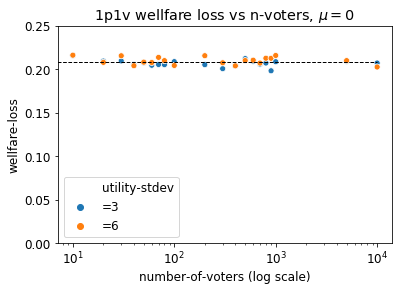

mean wellfare loss: 0.2083770833333333


In [22]:
adf = df[(df['voting-mechanism'] == "1p1v")].groupby(['number-of-voters', 'majority-utility-stdev']).aggregate('mean').reset_index()
adf['utility-stdev'] = adf['majority-utility-stdev'].apply(lambda n: '=' + str(n))

ax = sns.scatterplot(x="number-of-voters", 
                     y="wellfare-loss",    
                     hue='utility-stdev',
                     data = adf)
ax.set(xscale="log", 
       ylim= (0, 0.25),
       xlabel = "number-of-voters (log scale)")

plt.plot([0, adf['number-of-voters'].max()], [adf['wellfare-loss'].mean()]  * 2, 'k--', linewidth=1)
plt.title("1p1v wellfare loss vs n-voters, $\mu=0$")
plt.show()
print("mean wellfare loss: {}".format(adf['wellfare-loss'].mean()))

## Wellfare loss of QV vs N Voters

### Wellfare loss vs number of voters for several marginal pivotalities

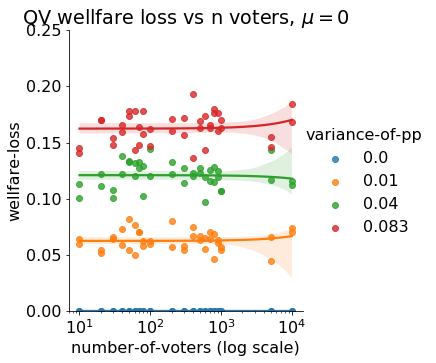

In [84]:
pdf = df[(df['voting-mechanism'] == 'QV') & (df['variance-of-pp'].isin([0, 0.01, 0.04, 0.083]))]

ax2 = sns.lmplot(x="number-of-voters", 
                     y="wellfare-loss",    
                     hue='variance-of-pp',
                     data = pdf)

ax2.set(xscale="log", 
       ylim= (0, 0.25),
       xlabel = "number-of-voters (log scale)")

plt.title('QV wellfare loss vs n voters, $\mu=0$')
plt.show()

### Wellfare loss vs number of voters for each marginal pivotality

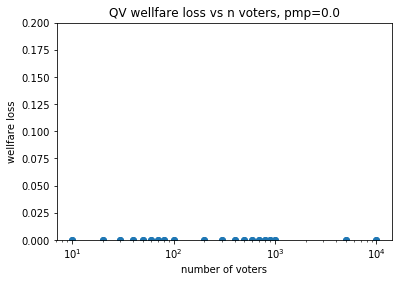

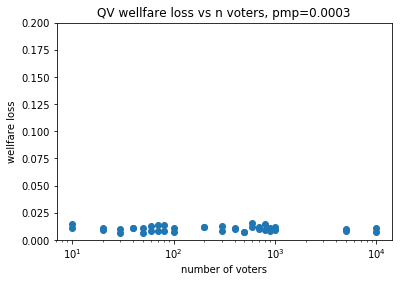

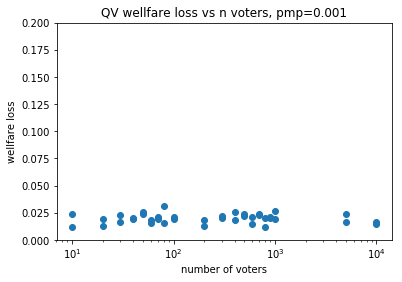

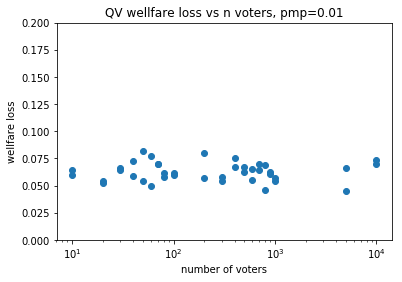

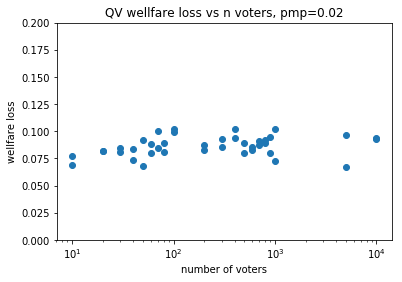

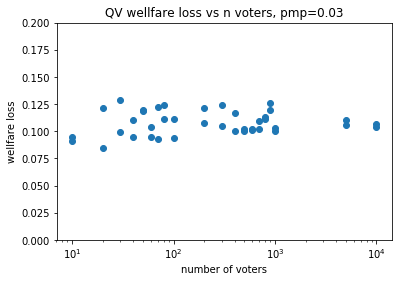

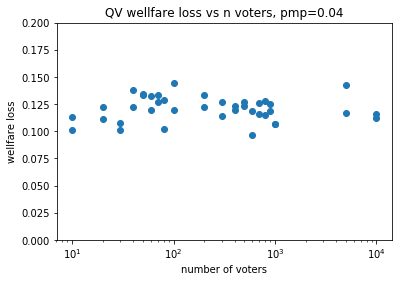

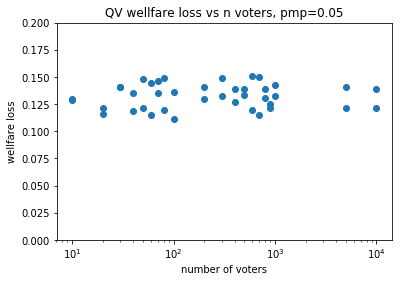

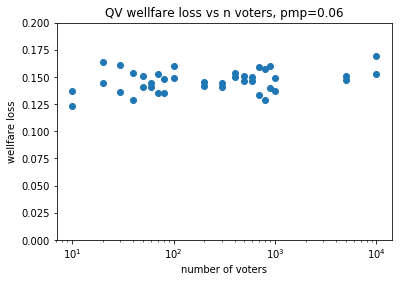

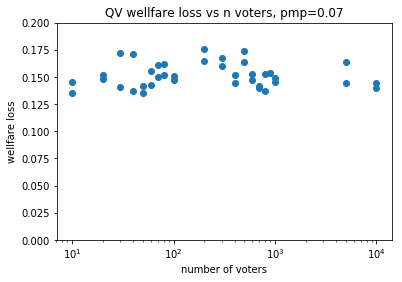

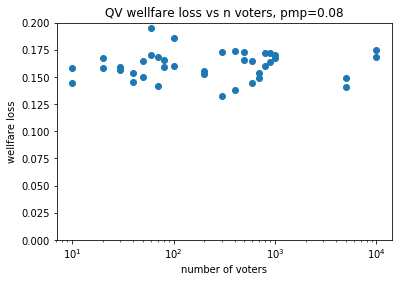

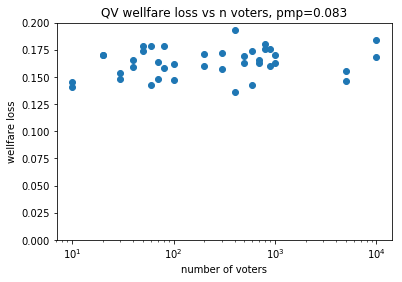

In [129]:
# adf = df[(df['voting-mechanism'] == "QV")].groupby(['number-of-voters', 'majority-utility-stdev', 'variance-of-perceived-pivotality']).aggregate('mean').reset_index()
for pmp in sorted(df['variance-of-perceived-pivotality'].unique()):
    pdf = df[(df['voting-mechanism'] == 'QV') & (df['variance-of-perceived-pivotality']==pmp)]
    plt.scatter(pdf['number-of-voters'], pdf['wellfare-loss'])
    plt.xscale('log')
    plt.xlabel('number of voters')
    plt.ylabel('wellfare loss')
    plt.title("QV wellfare loss vs n voters, pmp={}".format(pmp))
    plt.ylim(0, 0.2)
    plt.show()

## Wellfare loss of QV vs Variance of Percieved Pivotality

### Wellfare loss vs variance-of-pp for mean of all populations sizes together (plot for the figure)


In [45]:
# Data for QV right direction, random magnitude 
df9 = pd.read_csv('2020.07.10 QV-right-direction-random-magnitude-normal-dist.csv')
df9['wellfare-loss'] = 1 - df9['mean payoff-sign-list']
qv_rdrm = df9['wellfare-loss'].mean()

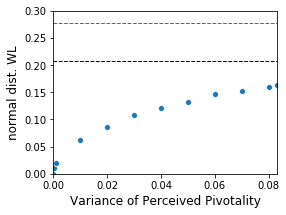

1p1v wl: 0.208377083333333
QV_rdwm: 0.27814285714285714


In [58]:
adf = df[(df['voting-mechanism'] == "QV")].groupby('variance-of-pp').aggregate('mean').reset_index()


fig, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(x='variance-of-pp',
                y='wellfare-loss',
                ax = ax,
                data=adf)
ax.set(xlim=(0, 0.083), ylim=(0,.3))
ax.set_xlabel('Variance of Perceived Pivotality', fontsize=12)
ax.set_ylabel('normal dist. WL', fontsize=12)
ax.tick_params(labelsize=10)

wl_1p1v = df[(df['voting-mechanism'] == "1p1v")]['wellfare-loss'].mean()
plt.plot([0, 0.083], [wl_1p1v]*2, 'k--', linewidth=1)

plt.plot([0, 0.083], [qv_rdrm]*2, 'C0--', linewidth=1)

plt.savefig('figures/sQV_WL_vs_pmp_variance_𝜇=0_2.png', bbox_inches='tight', dpi=300)
plt.show()

print("1p1v wl: {}".format(wl_1p1v))
print("QV_rdwm: {}".format(qv_rdrm))

### Wellfare loss vs variance-of-pp for each n_voters

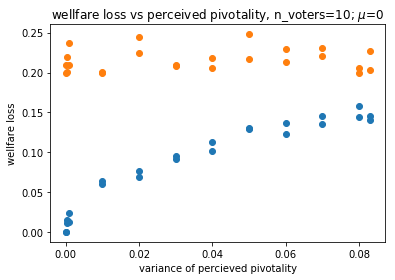

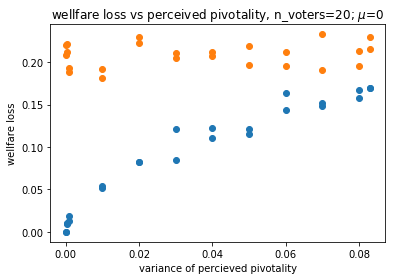

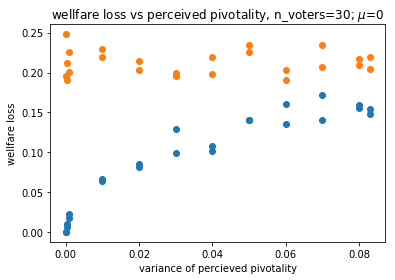

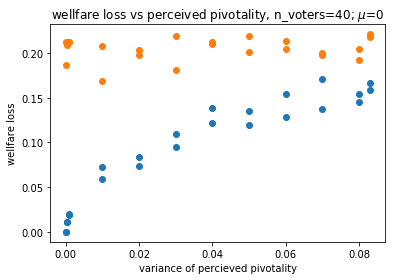

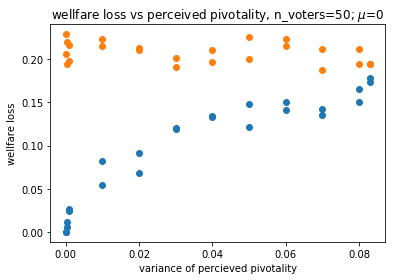

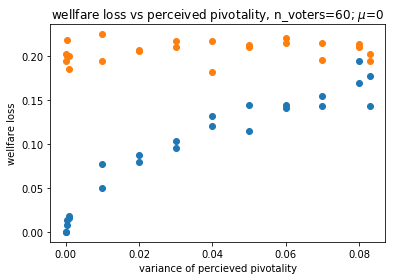

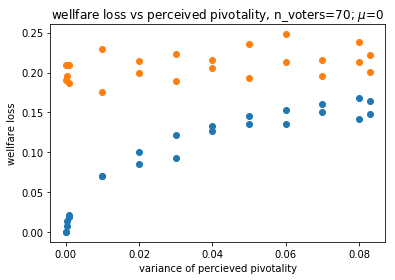

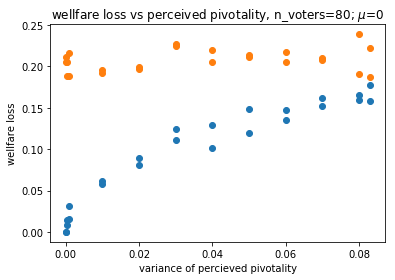

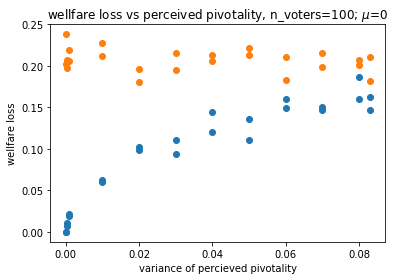

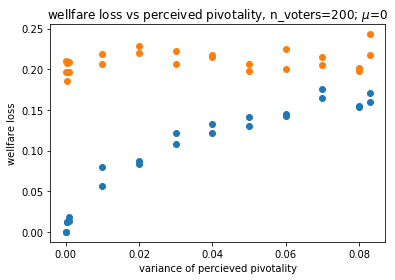

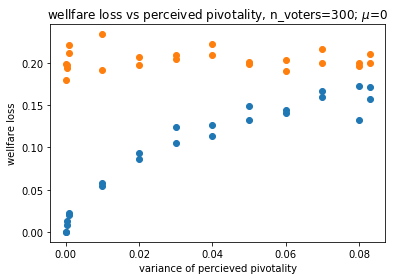

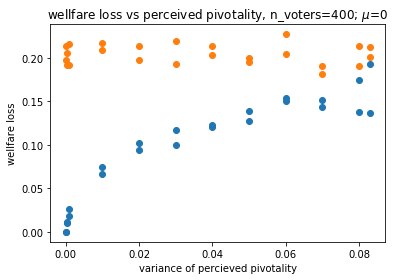

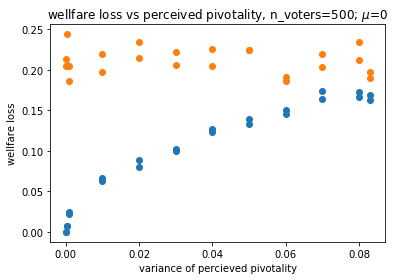

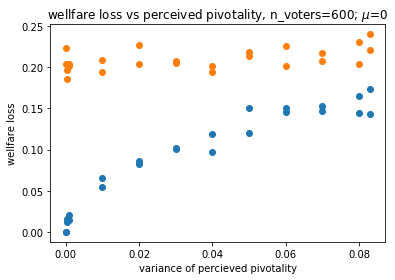

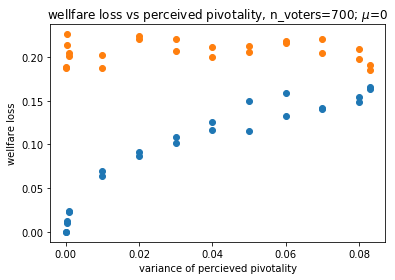

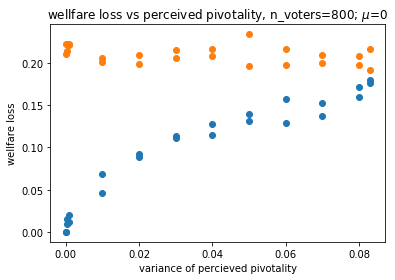

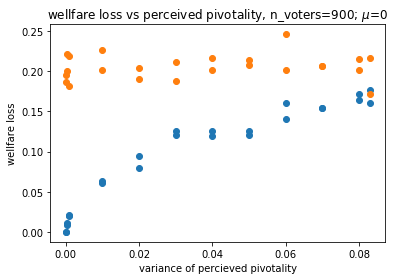

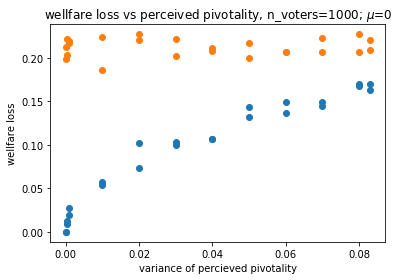

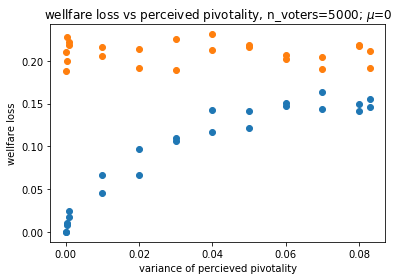

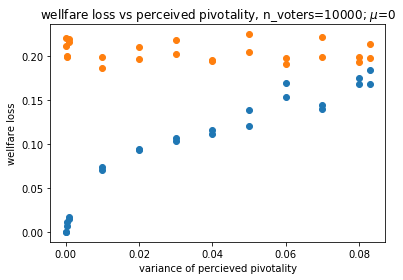

In [69]:

for n_voters in df['number-of-voters'].unique():
    df_qv = df[(df['number-of-voters'] == n_voters) & (df['voting-mechanism'] == "QV")].sort_values('variance-of-perceived-pivotality')
    df_1p1v = df[(df['number-of-voters'] == n_voters) & (df['voting-mechanism'] == "1p1v")]
    plt.plot(df_qv['variance-of-perceived-pivotality'], df_qv['wellfare-loss'], 'o')
    plt.plot(df_1p1v['variance-of-perceived-pivotality'], df_1p1v['wellfare-loss'], 'o')
    plt.xlabel('variance of percieved pivotality')
    plt.ylabel('wellfare loss')
    plt.title('wellfare loss vs perceived pivotality, n_voters={}; $\mu$=0'.format(n_voters))
    plt.show()

# Wellfare Loss Prop 8 Calibration


## The Data

In [97]:
df8 = pd.read_csv('2020.02.07 - QVoting-NormalizedPivotality 1p1v-vs-QV-prop8-mean>0.csv')
df8.rename(columns={'variance-of-perceived-pivotality': 'variance-of-pmp'}, inplace=True)
df8['wellfare-loss'] = 1 - df8['mean payoff-sign-list']
df8_1p1v = df8[(df8['voting-mechanism'] == "1p1v")]
df8_QV = df8[(df8['voting-mechanism'] == "QV")]

In [69]:
df8[0:5]

,[run number],number-of-voters,calibration,marginal-pivotality,variance-of-pp,voting-mechanism,[step],mean payoff-sign-list,mean payoff-list,standard-deviation payoff-list,mean vote-sum-list,standard-deviation vote-sum-list,mean mean-median-same-sign-list,wellfare-loss
0,1,11,1. prop8-mean>0,0.5,0.0000,1p1v,1000,0.787,1.513758,3.798378,-0.346000,3.372189,0.787,0.213
1,2,11,1. prop8-mean>0,0.5,0.0000,QV,1000,1.000,2.586638,3.359160,0.602044,2.032860,0.780,0.000
2,3,11,1. prop8-mean>0,0.5,0.0003,1p1v,1000,0.759,1.539862,4.396764,-0.608000,3.249753,0.759,0.241
3,4,11,1. prop8-mean>0,0.5,0.0003,QV,1000,0.985,2.585631,3.256052,0.653345,1.982123,0.770,0.015
4,5,11,1. prop8-mean>0,0.5,0.0010,1p1v,1000,0.805,1.477022,3.996354,-0.342000,3.347573,0.805,0.195


## Wellfare Loss of 1p1v and QV vs number of voters on one graph (for paper)

In [99]:
adf_1p1v = df8_1p1v.groupby(['number-of-voters']).aggregate('mean').reset_index()
adf_1p1v['voting-mechanism'] = "1p1v"
adf_1p1v['PMP-color'] = 'NA'

pdf_qv = df8_QV[df8_QV['variance-of-pmp'].isin([0.0003, 0.02, 0.083])].copy()
pdf_qv['PMP-color'] = pdf_qv['variance-of-pmp'].apply(lambda x: "=" + str(x))



# QV RDRM voters
df10 = pd.read_csv('2020.07.10 QV-right-direction-random-magnitude-prop8.csv')
df10['wellfare-loss'] = 1 - df10['mean payoff-sign-list']
df10['PMP-color'] = 'QV-RDRM'
df10 = df10[pdf_qv.columns]

#

cdf = pdf_qv.append(df10, sort=False)
cdf = cdf.append(adf_1p1v, sort=False).reset_index()

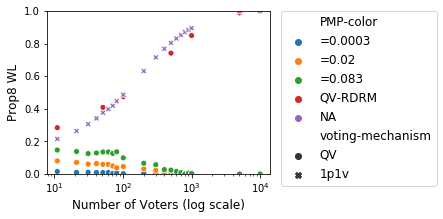

In [100]:
f, ax1 = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="number-of-voters",
                y="wellfare-loss",
                style='voting-mechanism',
                data=cdf,
                hue='PMP-color',
                ax=ax1)

ax1.set(xscale="log",ylim=(0,1))
ax1.set_xlabel("Number of Voters (log scale)", fontsize=12)
ax1.set_ylabel('Prop8 WL', fontsize=12)
ax1.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figures/sQV_WL_vs_n_voters_prop8.png", bbox_inches='tight', dpi=300)
plt.show()

##  Wellfare Loss of 1p1v vs number of voters

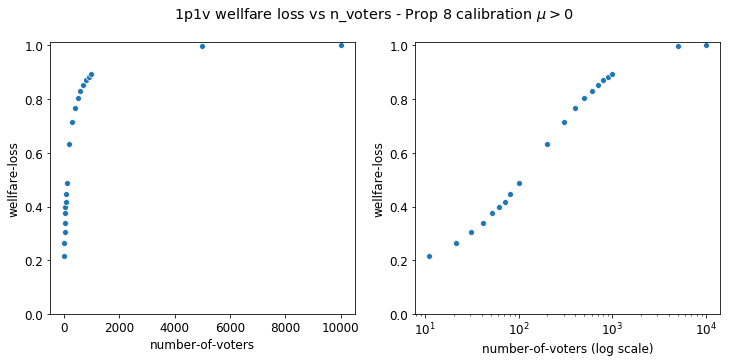

In [114]:
# Get mean across all data for same number of voters, since marginal pivotality doesn't matter for 1p1v
adf = df8_1p1v.groupby(['number-of-voters']).aggregate('mean').reset_index()

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="number-of-voters", 
                y="wellfare-loss",
                data = adf,
                ax=ax1)

sns.scatterplot(x="number-of-voters", 
                y="wellfare-loss",
                data = adf,
                ax=ax2)
ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
ax1.set(ylim=(0,1.01))
ax2.set(ylim=(0,1.01))
f.suptitle('1p1v wellfare loss vs n_voters - Prop 8 calibration $\mu>0$')
plt.savefig('foo.png')
plt.show()

## Wellfare loss of QV vs number of voters

### Single Graph with Three variance-of-pp values 

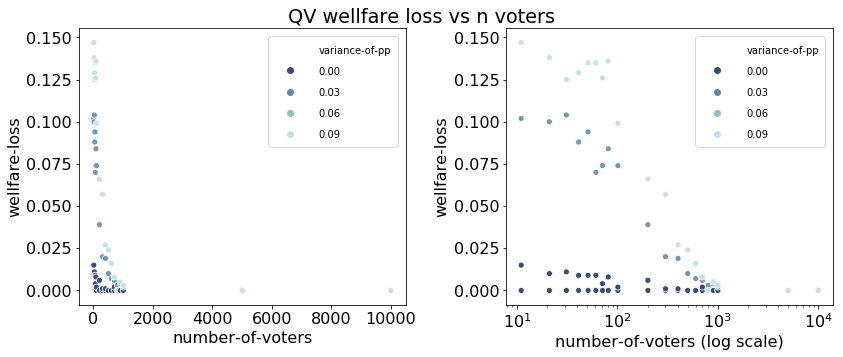

In [71]:
pdf = df8_QV[df8_QV['variance-of-pp'].isin([0, 0.0003, 0.04, 0.083])]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                hue='variance-of-pp',
                palette="ch:r=-.2,d=.3_r",
                data=pdf, ax=ax1)

sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                hue='variance-of-pp',
                palette="ch:r=-.2,d=.3_r",
                data=pdf, ax=ax2)
ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")

plt.setp(ax1.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='10') # for legend title
plt.setp(ax2.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='10') # for legend title

f.suptitle("QV wellfare loss vs n voters", y=1)

f.tight_layout()



### Separate Graphs for Each Variance-of-pp  value

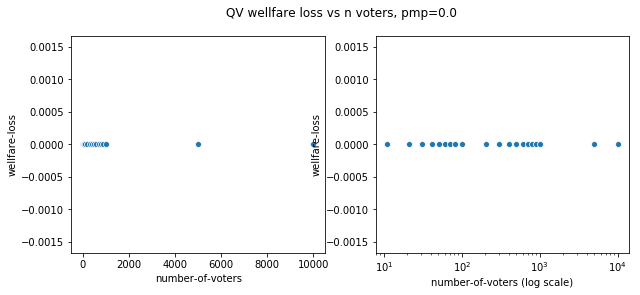

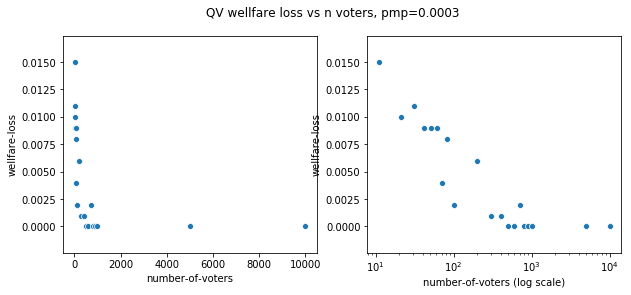

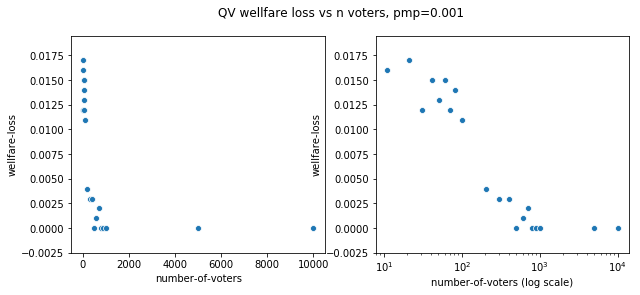

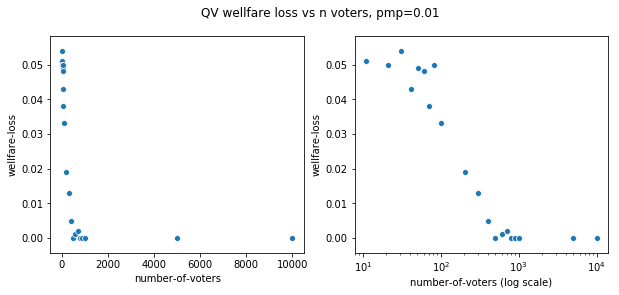

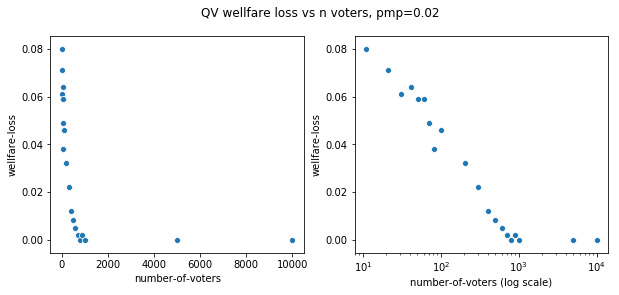

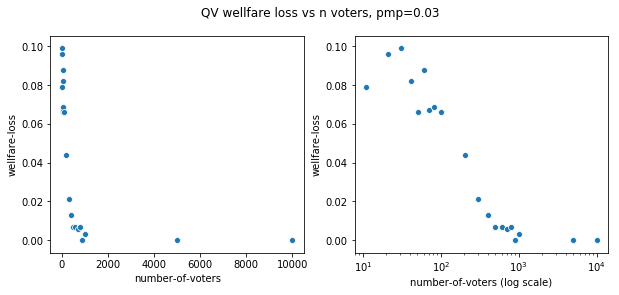

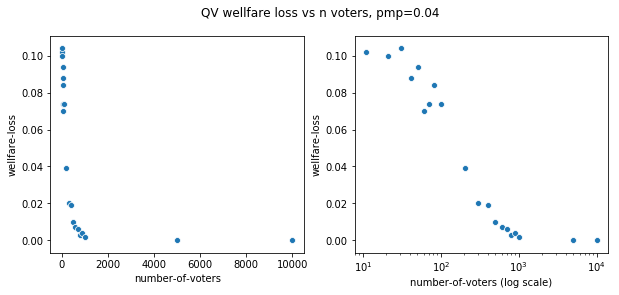

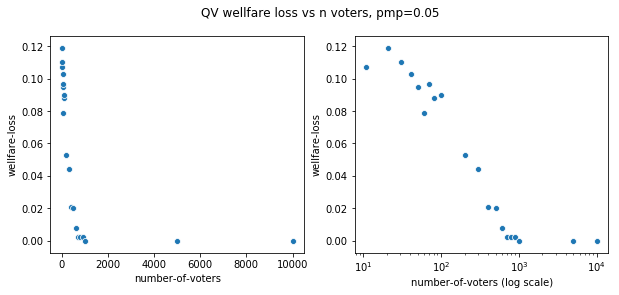

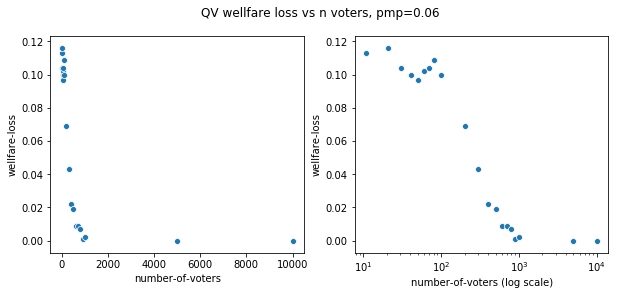

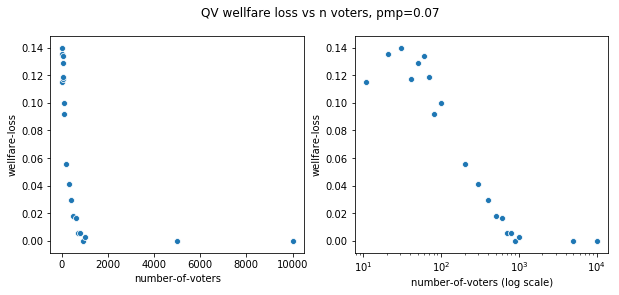

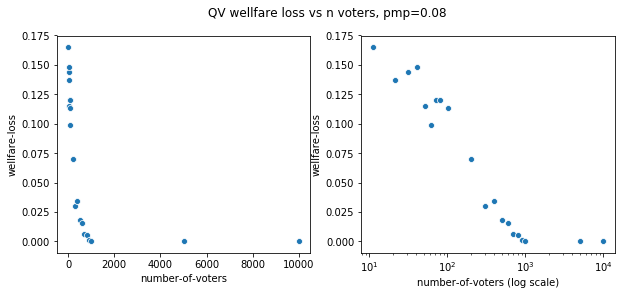

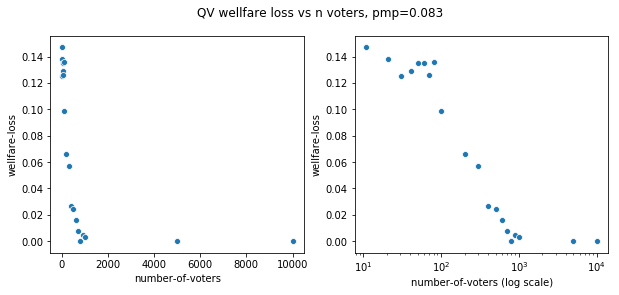

In [51]:
for pmp in sorted(df8_QV['variance-of-perceived-pivotality'].unique()):
    pdf = df8_QV[df8_QV['variance-of-perceived-pivotality']==pmp]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                    data=pdf, ax=ax1)

    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
                    data=pdf, ax=ax2)
    ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
    
    f.suptitle("QV wellfare loss vs n voters, pmp={}".format(pmp))
    plt.show()

## Wellfare loss of QV vs Variance of Percieved Pivotality

### Single Graph with four number-of-voters values

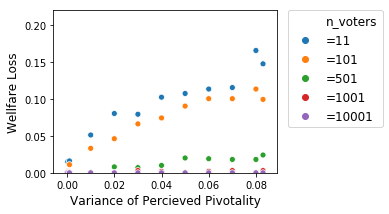

In [176]:
pdf = df8_QV[df8_QV['number-of-voters'].isin([11, 101, 501, 1001, 10001])].copy()
pdf['n_voters'] = pdf['number-of-voters'].apply(lambda n: "=" + str(n))


f, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="variance-of-pp", y="wellfare-loss",
                hue="n_voters",
                legend='full',
                ax=ax,
                data = pdf)

ax.set(ylim=(0,.22))
ax.set_xlabel("Variance of Percieved Pivotality", fontsize=12)
ax.set_ylabel('Wellfare Loss', fontsize=12)
ax.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figures/1QV_WL_vs_VMPP_prop8.png", bbox_inches='tight', dpi=300)
plt.show()

### Separate Graphs for Each number-of-voters value

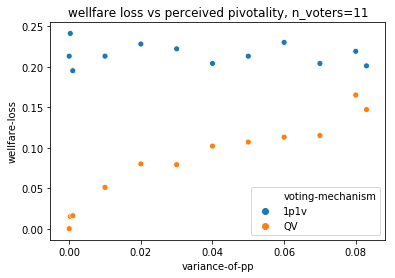

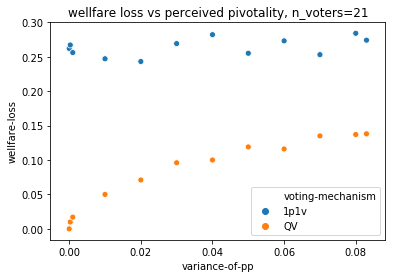

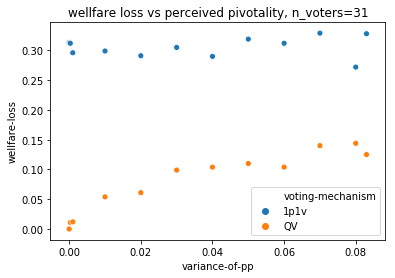

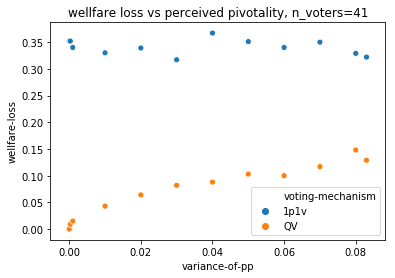

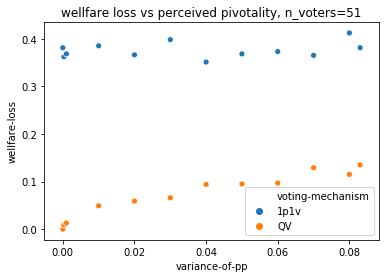

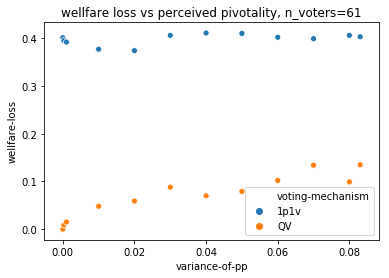

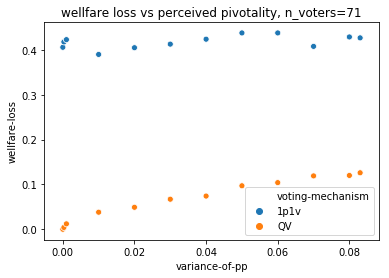

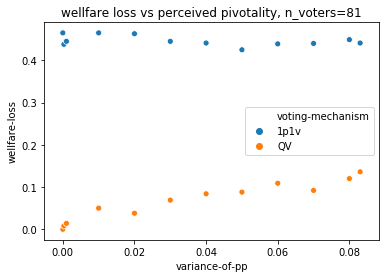

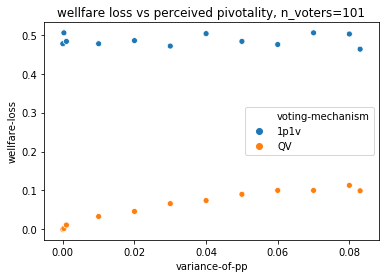

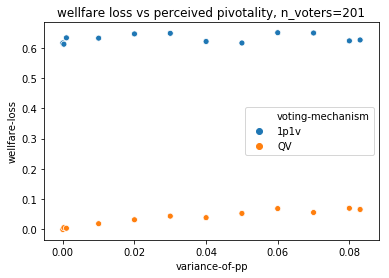

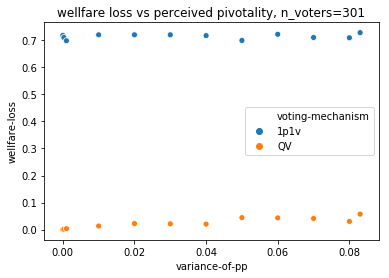

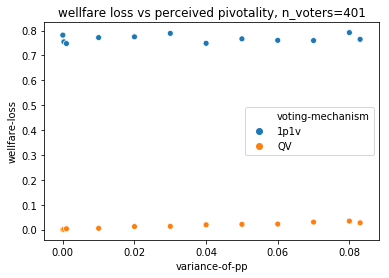

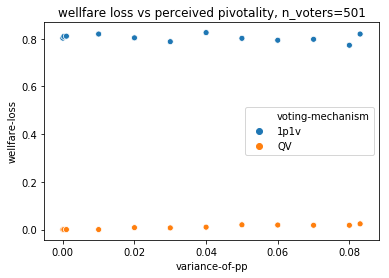

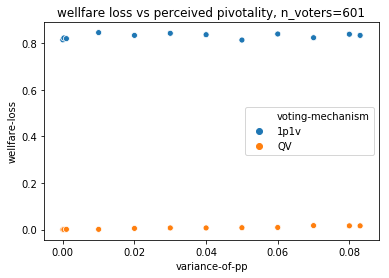

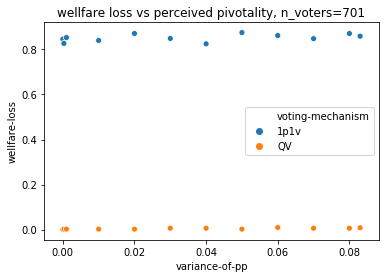

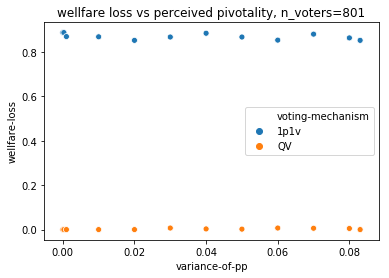

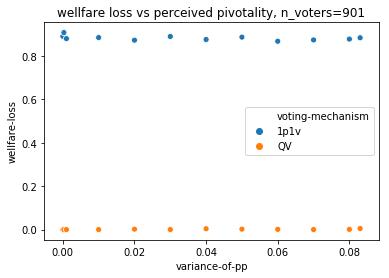

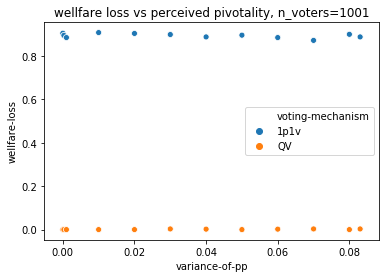

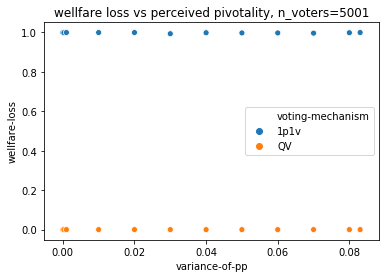

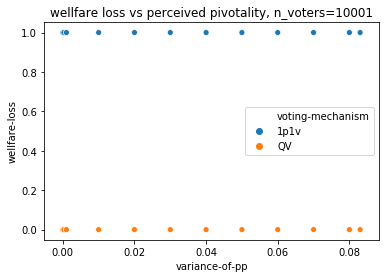

In [98]:
for n_voters in df8['number-of-voters'].unique():
    ax = sns.scatterplot(x="variance-of-pp", y="wellfare-loss",
                    hue="voting-mechanism",
                    data = df8[df8["number-of-voters"] == n_voters])
    ax.set_title('wellfare loss vs perceived pivotality, n_voters={}'.format(n_voters))
    plt.show()

# Wellfare Loss Prop8 Calibration, MP divided by various amounts

## The Data

In [77]:
df8 = pd.read_csv('2020.02.22-single-issue-QV-prop8-divide-mpp.csv')
cols_to_drop = ['minority-fraction', 'majority-mean-utility', 'majority-utility-stdev', 'minority-mean-utility',
                'minority-utility-stdev', 'limit-votes?', 'payoff-include-votes-cost?']
df8.drop(columns=cols_to_drop, inplace=True)
df8.rename(columns={'variance-of-perceived-pivotality': 'variance-of-pp'}, inplace=True)
df8['wellfare-loss'] = 1 - df8['mean payoff-sign-list']
df8_1p1v = df8[(df8['voting-mechanism'] == "1p1v")].copy().reset_index()
df8_QV = df8[(df8['voting-mechanism'] == "QV")].copy().reset_index()
df8_QV['mpp-str'] = df8_QV['mpp-divided'].apply(lambda x: "=" + str(x))

## Wellfare loss of QV vs number of voters

There doesn't seem to be any difference in WL depending on if perceived marginal pivotality is divided by 10, 100 or not.

In [78]:
def WL_vs_num_voters(pdf, title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
#                     hue='variance-of-pp',
                    hue="mpp-str",
                    data=pdf, ax=ax1)

    sns.scatterplot(x="number-of-voters", y="wellfare-loss",
#                     hue='variance-of-pp',
                    hue="mpp-str",
                    data=pdf, ax=ax2)
    ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")

    plt.setp(ax1.get_legend().get_texts(), fontsize='10') # for legend text
    plt.setp(ax1.get_legend().get_title(), fontsize='10') # for legend title
    plt.setp(ax2.get_legend().get_texts(), fontsize='10') # for legend text
    plt.setp(ax2.get_legend().get_title(), fontsize='10') # for legend title

    f.suptitle(title, y=1)

    f.tight_layout()
    plt.show()



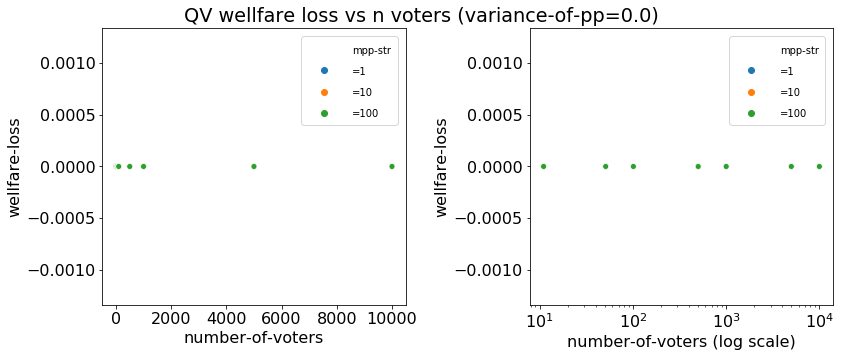

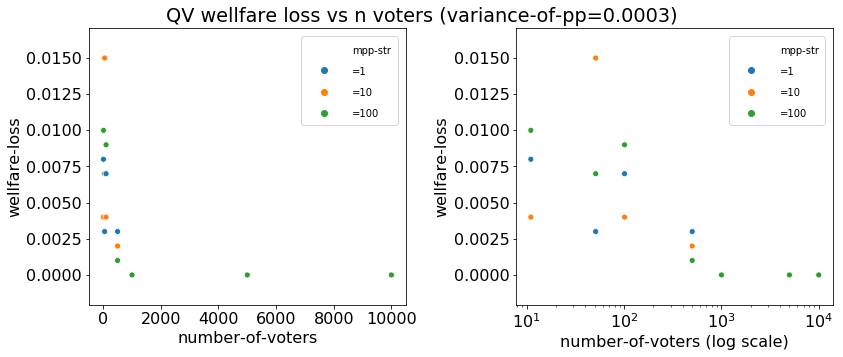

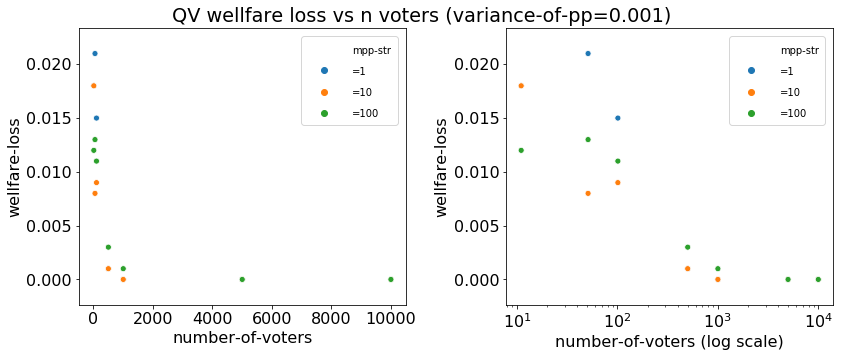

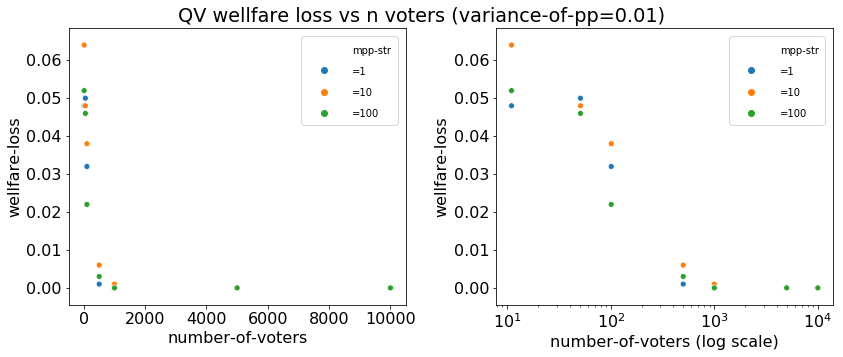

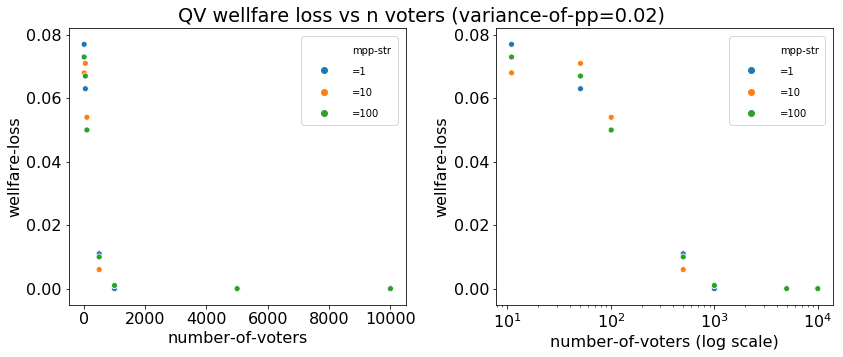

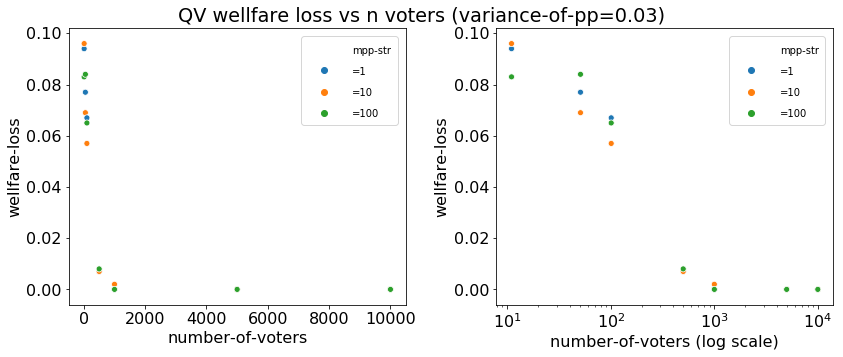

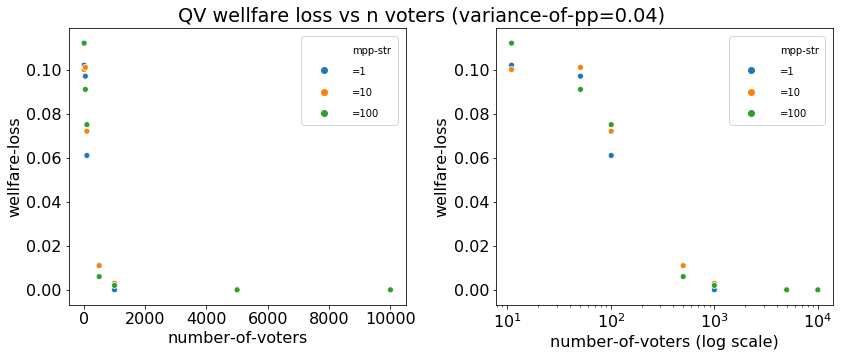

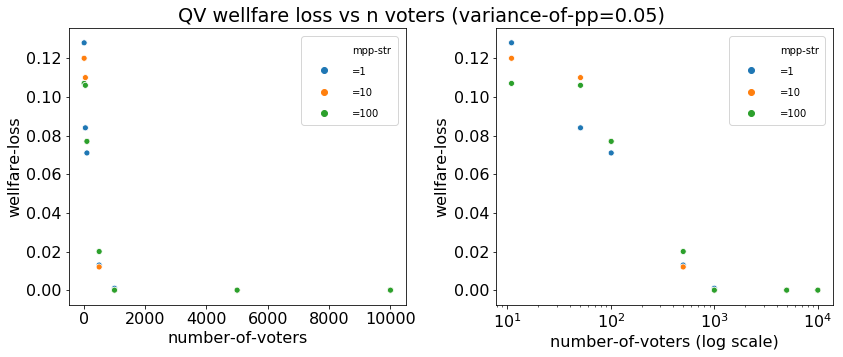

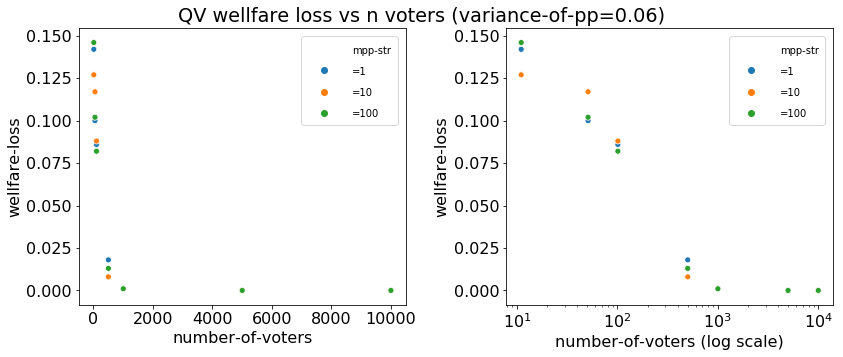

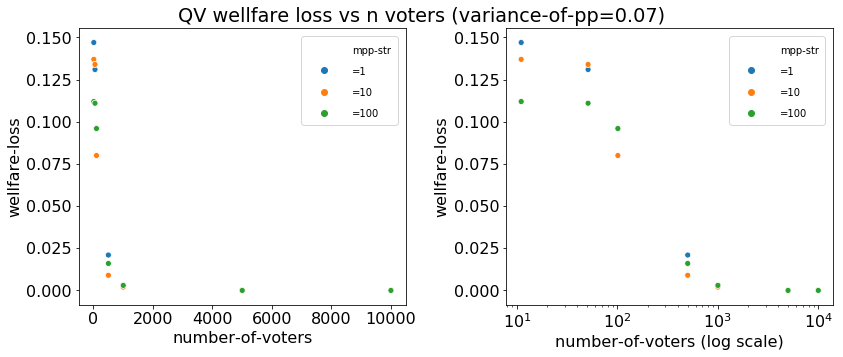

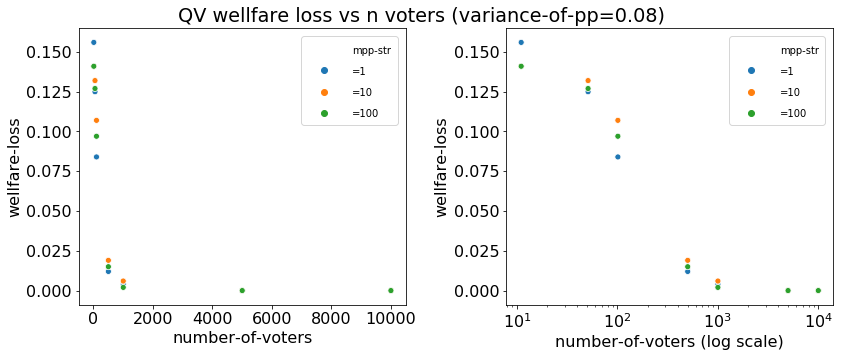

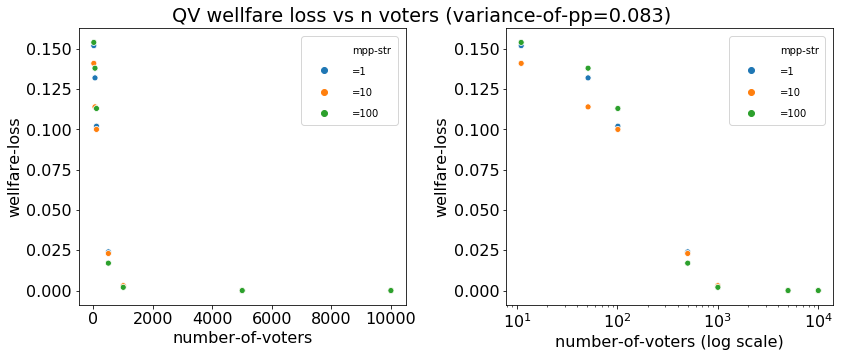

In [79]:
for var_pp in df8_QV['variance-of-pp'].unique():
    WL_vs_num_voters(df8_QV[df8_QV['variance-of-pp'] == var_pp], "QV wellfare loss vs n voters (variance-of-pp={})".format(var_pp))

## Wellfare loss of QV vs variance of perceived pivotality

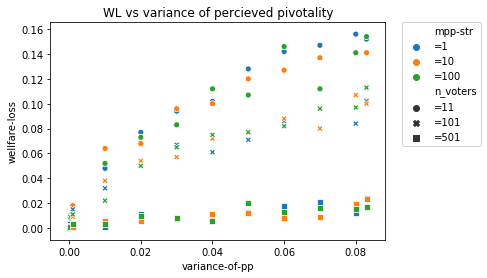

In [59]:
def plot_WL_vs_variance_of_pp(ldf, n_voters_list, title):
    pdf = ldf[ldf['number-of-voters'].isin(n_voters_list)].copy()
    pdf['n_voters'] = pdf['number-of-voters'].apply(lambda n: "=" + str(n))

    ax = sns.scatterplot(x="variance-of-pp", y="wellfare-loss",
                    hue="mpp-str",
                    style="n_voters",
                    legend='full',
                    data = pdf)
    plt.title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
plot_WL_vs_variance_of_pp(df8_QV, [11, 101, 501], "WL vs variance of percieved pivotality")
# 1001, 10001

# WL - QV Right Direction Random Magnitude results

## QV-RDRM Normal Distribution

### The Data

In [36]:
df9 = pd.read_csv('2020.07.10 QV-right-direction-random-magnitude-normal-dist.csv')
df9['wellfare-loss'] = 1 - df9['mean payoff-sign-list']
df9['wellfare-loss'].mean()

0.27814285714285714

In [40]:
x = .87
1  - (.8 * x + .2 * (1-x))

0.2779999999999999

### The graph
The reason that this is slightly worse than 1p1v is:
When the median and mean of the utilities have the same sign, 1p1v maximizes welfare. With a normal distribution, this is about .8 of the time. When they are oposite, 1p1v doesn't maximize welfare. So, 1p1v has WL of about .2 for normally distributed utilities. 

QV-RDRM acts like 1p1v but with noise. With a normal distribution, that noise is bad 80% of the time when the mean and medians are the same, because the noise either does nothing, or flips the outcome incorrectly. The noise is good the other 20% of the time. So on the whole QV-RDRM does worse than 1p1v on a normal distribution. 

No handles with labels found to put in legend.


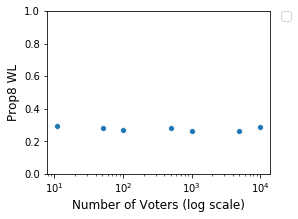

mean wellfare loss: 0.27814285714285714


In [30]:
f, ax1 = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="number-of-voters",
                y="wellfare-loss",
                data=df9,
                ax=ax1)

ax1.set(xscale="log",ylim=(0,1))
ax1.set_xlabel("Number of Voters (log scale)", fontsize=12)
ax1.set_ylabel('Prop8 WL', fontsize=12)
ax1.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig("figures/sQV_WL_vs_n_voters_prop8.png", bbox_inches='tight', dpi=300)
plt.show()
print("mean wellfare loss: {}".format(df9['wellfare-loss'].mean()))

## Prop 8 

### The Data

In [59]:
df10 = pd.read_csv('2020.07.10 QV-right-direction-random-magnitude-prop8.csv')
df10['wellfare-loss'] = 1 - df10['mean payoff-sign-list']
df10['wellfare-loss'].min()

0.28400000000000003

No handles with labels found to put in legend.


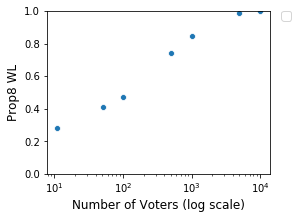

In [14]:
f, ax1 = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="number-of-voters",
                y="wellfare-loss",
                data=df10,
                ax=ax1)

ax1.set(xscale="log",ylim=(0,1))
ax1.set_xlabel("Number of Voters (log scale)", fontsize=12)
ax1.set_ylabel('Prop8 WL', fontsize=12)
ax1.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig("figures/sQV_WL_vs_n_voters_prop8.png", bbox_inches='tight', dpi=300)
plt.show()

## 1p1v normal dist comparison

In [34]:
df11 = pd.read_csv('2020.07.10 1p1v-normal-dist.csv')
df11['wellfare-loss'] = 1 - df11['mean payoff-sign-list']
df11

,[run number],number-of-voters,minority-fraction,majority-mean-utility,majority-utility-stdev,minority-mean-utility,minority-utility-stdev,calibration,marginal-pivotality,variance-of-pmp,...,payoff-include-votes-cost?,voting-mechanism,[step],mean payoff-sign-list,mean payoff-list,standard-deviation payoff-list,mean vote-sum-list,standard-deviation vote-sum-list,mean mean-median-same-sign-list,wellfare-loss
0,2,51,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.807,9.252325,10.720377,-0.258,6.983854,0.807,0.193
1,1,11,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.822,4.404294,4.845724,0.018,3.375659,0.822,0.178
2,3,101,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.777,12.674151,15.903170,-0.092,9.904021,0.777,0.223
3,4,501,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.797,27.310192,33.596832,0.172,21.449627,0.797,0.203
4,5,1001,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.822,43.343398,47.754228,1.078,32.428406,0.822,0.178
5,6,5001,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.789,92.669346,113.352887,0.922,71.479138,0.789,0.211
6,7,10001,0,0,2,10,1,manual,0.5,0,...,False,1p1v,1000,0.811,133.714622,153.346359,-0.640,99.696267,0.811,0.189


No handles with labels found to put in legend.


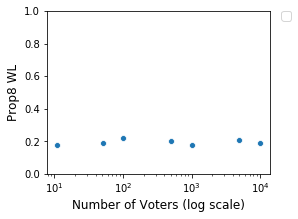

mean wellfare loss: 0.1964285714285714


In [31]:
f, ax1 = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="number-of-voters",
                y="wellfare-loss",
                data=df11,
                ax=ax1)

ax1.set(xscale="log",ylim=(0,1))
ax1.set_xlabel("Number of Voters (log scale)", fontsize=12)
ax1.set_ylabel('Prop8 WL', fontsize=12)
ax1.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig("figures/sQV_WL_vs_n_voters_prop8.png", bbox_inches='tight', dpi=300)
plt.show()
print("mean wellfare loss: {}".format(df11['wellfare-loss'].mean()))

# Vote vs Utility Graphs


In [54]:
d1p1v = pd.read_csv('u-vs-v-1p1v.csv')
QV0 = pd.read_csv('u-vs-v-QV-no-variance.csv')
QV5 = pd.read_csv('u-vs-v-QV-variance=.050.csv')
QVrdrm = pd.read_csv('u-vs-v-QV-rdrm.csv')

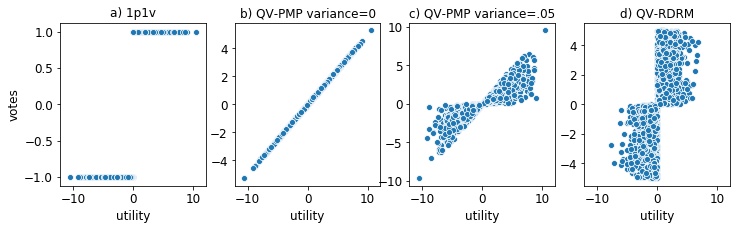

In [55]:


f, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

sns.scatterplot(x="u", y="v", data = d1p1v, ax=axes[0])
sns.scatterplot(x="u", y="v", data = QV0, ax=axes[1])
sns.scatterplot(x="u", y="v", data = QV5, ax=axes[2])
sns.scatterplot(x="u", y="v", data = QVrdrm, ax=axes[3])

for i in range(4):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('utility')
axes[0].set_ylabel('votes')


axes[0].set_title('a) 1p1v', fontsize=12)
axes[1].set_title('b) QV-PMP variance=0', fontsize=12)
axes[2].set_title('c) QV-PMP variance=.05', fontsize=12)
axes[3].set_title('d) QV-RDRM', fontsize=12)

plt.savefig('figures/QV-u-vs-v.png', bbox_inches='tight', dpi=300)
plt.show()


,x,y,color,high-u?
0,0.607910,0.881649,0,False
1,-0.199343,-0.289106,0,False
2,0.007877,0.011424,0,False
3,0.034586,0.050159,0,False
4,-0.026506,-0.038442,0,False
5,0.185773,0.269426,0,False
6,-0.031820,-0.046149,0,False
7,0.091744,0.133057,0,False
8,0.090648,0.131466,0,False
9,-0.109633,-0.159000,0,False


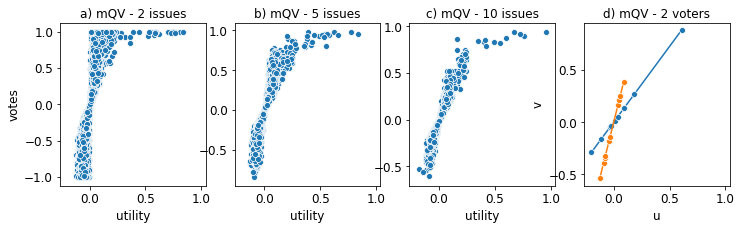

In [53]:
mQV2 = pd.read_csv('u-vs-v-mQV-2-issues.csv')
mQV5 = pd.read_csv('u-vs-v-mQV-5-issues.csv')
mQV10 = pd.read_csv('u-vs-v-mQV-10-issues.csv')

mQV2voters = pd.read_csv('u-vs-v-mQV-2-individuals.csv')
mQV2voters['high-u?'] = mQV2voters['color'] > 0

f, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

sns.scatterplot(x="u", y="v", data = mQV2, ax=axes[0])
sns.scatterplot(x="u", y="v", data = mQV5, ax=axes[1])
sns.scatterplot(x="u", y="v", data = mQV10, ax=axes[2])
sns.lineplot(x="u", y="v", hue='high-u?', marker='o', data = mQV2voters, ax=axes[3])

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('utility')
axes[0].set_ylabel('votes')

axes[0].set_title('a) mQV - 2 issues', fontsize=12)
axes[1].set_title('b) mQV - 5 issues', fontsize=12)
axes[2].set_title('c) mQV - 10 issues', fontsize=12)
axes[3].set_title('d) mQV - 2 voters', fontsize=12)
axes[3].get_legend().remove()

plt.savefig('figures/mQV-u-vs-v.png', bbox_inches='tight', dpi=300)
plt.show()


# Beta Distribution

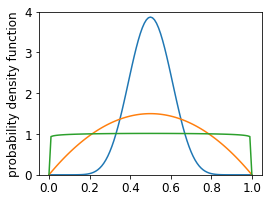

In [102]:
import scipy.stats as stats

dfb = pd.DataFrame(columns=['x', 'y', 'var'])
fig, ax = plt.subplots(figsize=(4, 3))

# plt.plot([0.5, 0.5], [0, 4], '-')

for var in [0.01, 0.05, 0.082]:
    ave = 0.5
    max_var =  ave - ave ** 2

    a =  ave ** 2 * ( (1 - ave) / var - 1 / ave)
    b = a * (1 / ave - 1)

    x = np.arange(0, 1.01, 0.01)
    y = stats.beta.pdf(x, a, b)
    
    sns.lineplot(x, y, ax=ax)

plt.ylim(0, 4)
ax.set_ylabel('probability density function')
plt.savefig('figures/beta-dist.png', bbox_inches='tight', dpi=300)
    
